## Методы машинного обучения без учителя и предварительная обработка данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs, make_circles, make_moons, load_iris
plt.rc('font', family='Verdana')

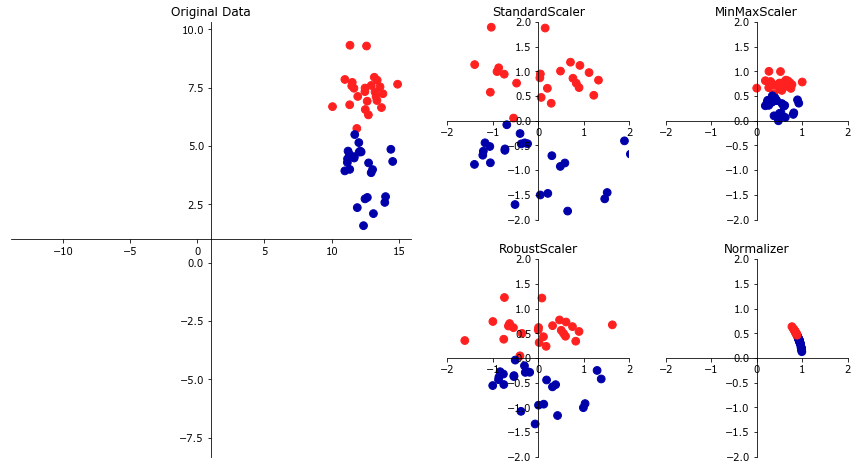

In [2]:
# способы масштабирования и предварительной обработки данных
mglearn.plots.plot_scaling()

<h3 style="color: green;">Применение преобразований данных</h3>

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

C помощью fit() мы подгоняем объект scaler на обучающих данных. MinMaxScaler.fit вычисляет минимальное и максимальное значения каждого признака. В отличии классификаторов и регрессоров fit() обрабатывает исходные данные.

In [9]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
# преобразование данных
X_train_scaled = scaler.transform(X_train)
print("форма преобразованного массива: {}".format(X_train_scaled.shape))
print("min значение признака до масштабирования:\n {}".format(X_train.min(axis=0)))
print("max значение признака до масштабирования:\n {}".format(X_train.max(axis=0)))
print("min значение признака после масштабирования:\n {}".format(X_train_scaled.min(axis=0)))
print("max значение признака после масштабирования:\n {}".format(X_train_scaled.max(axis=0)))

форма преобразованного массива: (426, 30)
min значение признака до масштабирования:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
max значение признака до масштабирования:
 [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]
min значение признака после масштабирования:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
max значение признака после масштабирования:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1

In [16]:
# как видно ниже тестовые набор данных масштабировалось по-другому.
X_test_scaled = scaler.transform(X_test)
print("min значение признака после масштабирования:\n {}".format(X_test_scaled.min(axis=0)))
print("max значение признака после масштабирования:\n {}".format(X_test_scaled.max(axis=0)))

min значение признака после масштабирования:
 [ 0.03540158  0.04190871  0.02895446  0.01497349  0.14260888  0.04999658
  0.          0.          0.07222222  0.00589722  0.00105015 -0.00057494
  0.00067851 -0.0007963   0.05148726  0.01434497  0.          0.
  0.04195752  0.01113138  0.03678406  0.01252665  0.03366702  0.01400904
  0.08531995  0.01833687  0.          0.          0.00749064  0.02367834]
max значение признака после масштабирования:
 [0.76809125 1.22697095 0.75813696 0.64750795 1.20310633 1.11643038
 0.99906279 0.90606362 0.93232323 0.94903117 0.45573058 0.72623944
 0.48593507 0.31641282 1.36082713 1.2784499  0.36313131 0.77476795
 1.32643996 0.72672498 0.82106012 0.87553305 0.77887345 0.67803775
 0.78603975 0.87843331 0.93450479 1.0024113  0.76384782 0.58743277]


<h3 style="color: green;">Масштабирование обучающего и тестового наборов одинаковым образом</h3>

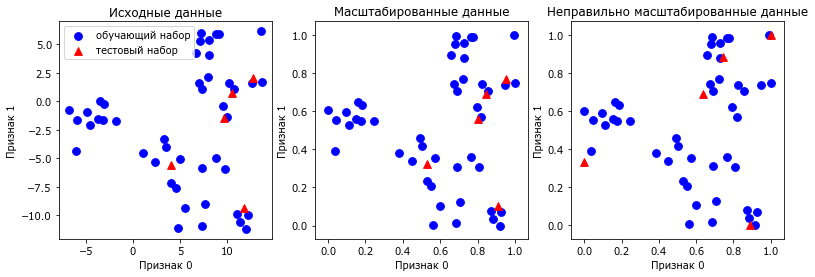

In [30]:
# создаём синтетические данные 
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# разбиваем их на обучающий и тестовый набор
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# размещаем на графике обучающий и тестовый наборы
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c='blue', label="обучающий набор", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c='red', label="тестовый набор", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Исходные данные")

# масштабируем данные с помощью MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# визуализируем правильно масштабированные данные
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='blue', label="обучающий набор", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker="^", c='red', label="тестовый набор", s=60)
axes[1].set_title("Масштабированные данные")

# масштабируем тестовый набо отдельно, чтобы в тестовом наборе min значение каждого признака было
# равно 0, а max значение каждого признака равнялось 1.
# НЕ ДЕЛАТЬ ТАК! только в ознокомительных целях
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaler_badly = test_scaler.transform(X_test)

# визуализируем неправильно масштабированные данные
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='blue', label="обучающий набор", s=60)
axes[2].scatter(X_test_scaler_badly[:, 0], X_test_scaler_badly[:, 1], marker="^", c='red', label="тестовый набор", s=60)
axes[2].set_title("Неправильно масштабированные данные")

for ax in axes:
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")

<h3 style="color: green;">Влияние предварительной обработки на машинное обучение с учителем</h3>